# Matched filter

## Select matched filter

In [21]:
import soundfile as sf
from scipy import signal
from visualization.plots import *
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Signal shape: (455040,)
 Sampling rate: 44100



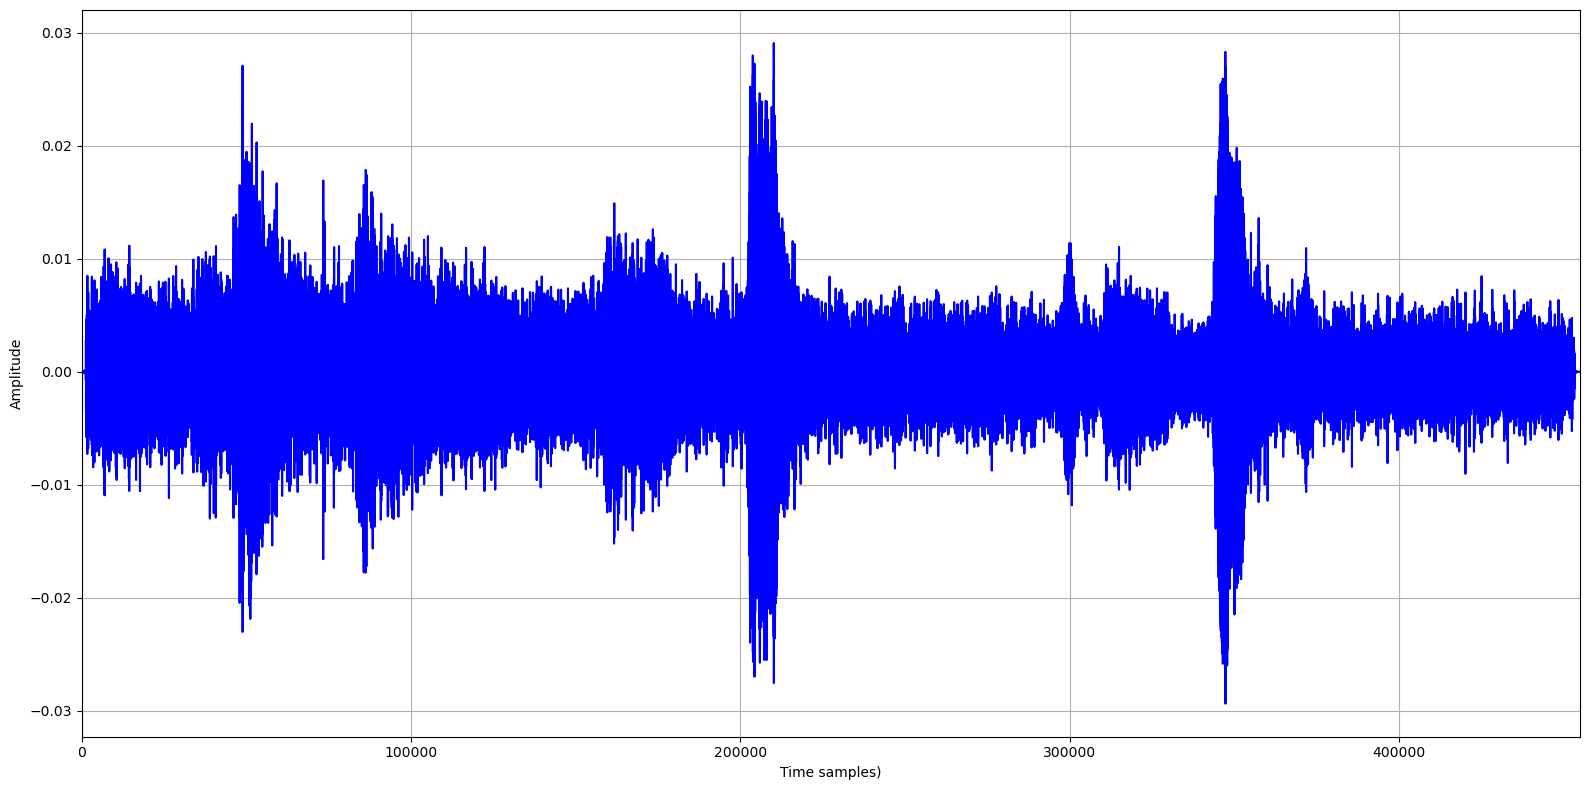

In [22]:
x_1, sr = sf.read('myszołów.mp3')
x=x_1[:,0] #pick one channel
plot_waveform(x, sr)

Signal shape: (19000,)
 Sampling rate: 44100



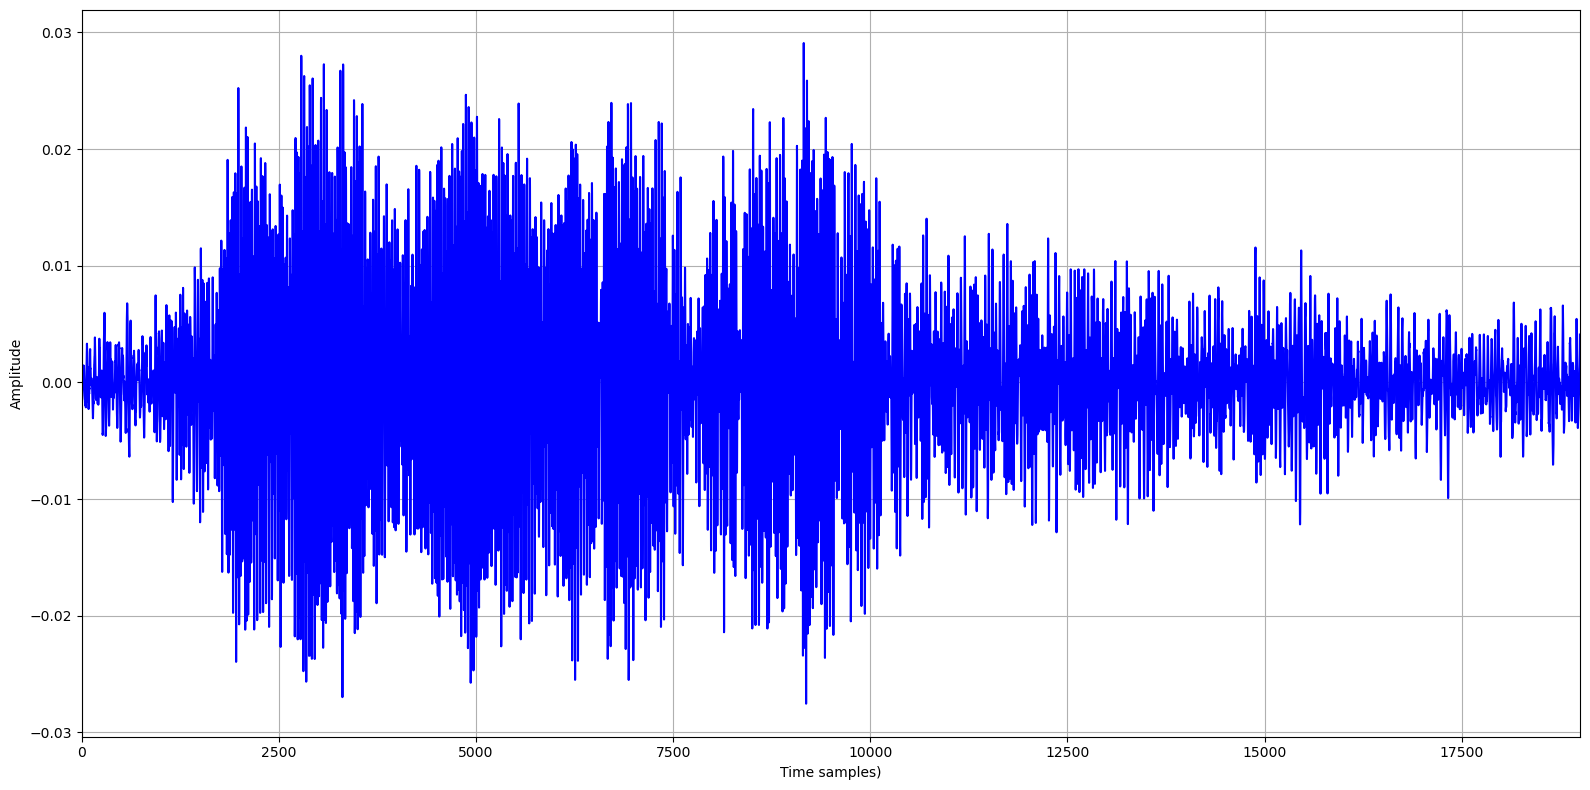

In [23]:
plot_waveform(x[201000:220000],sr)

## Apply filter

In [24]:
h=np.flip(x[201000:220000])
a=1
x_new=signal.lfilter(h, a, x)
filter_delay=int((len(h)-1)/2)

Signal shape: (455040,)
 Sampling rate: 44100



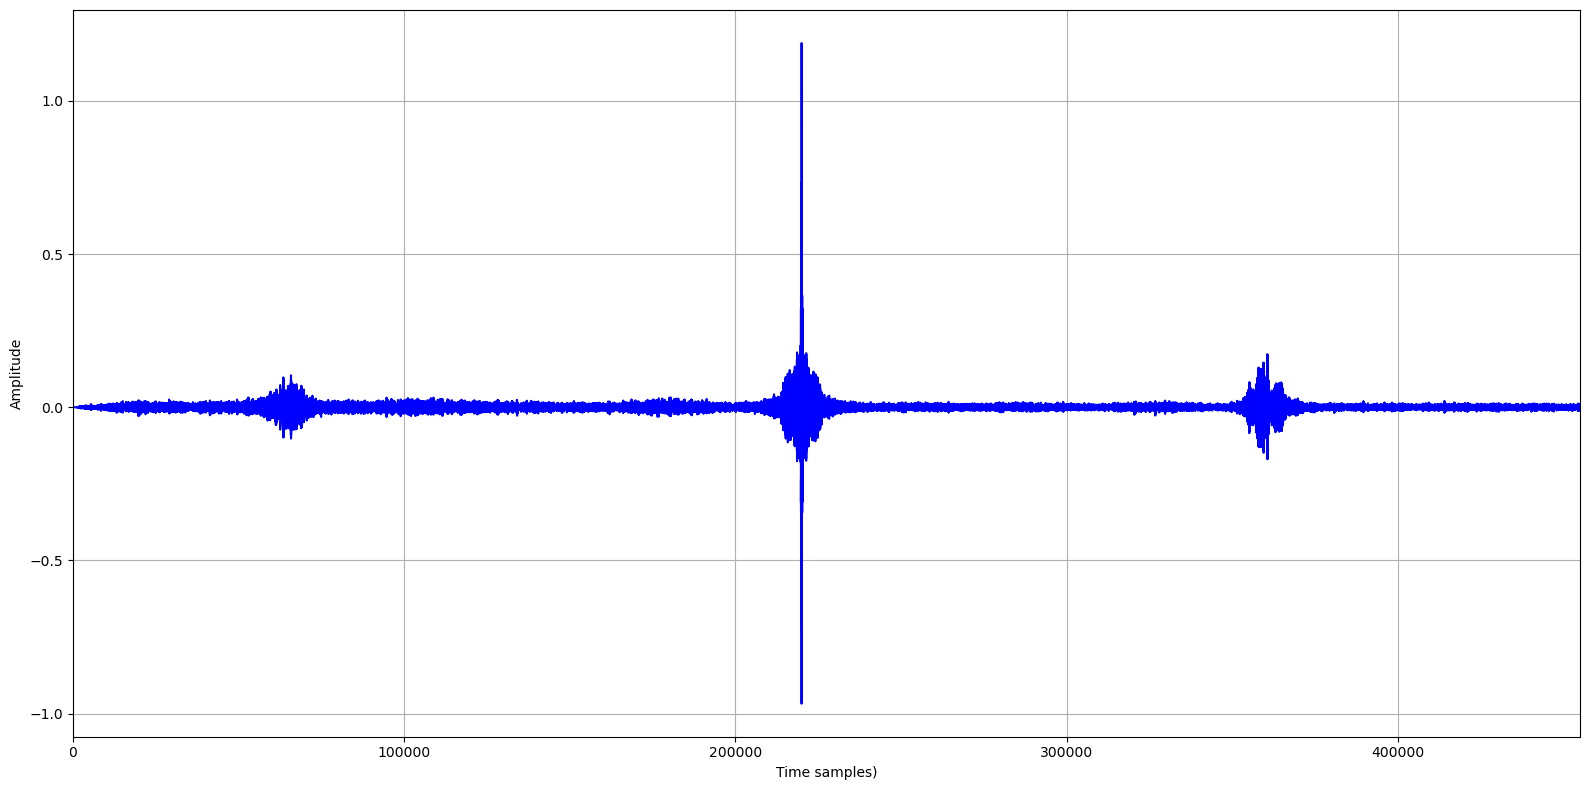

In [25]:
plot_waveform(x_new, sr)

## Envelope

In [26]:
from scipy.signal import hilbert

In [27]:
analytic_signal = hilbert(x_new)
envelope = np.abs(analytic_signal)
b=np.ones(1000)
b=b/len(b)
a=1
envelope_1=signal.filtfilt(b, a,envelope)

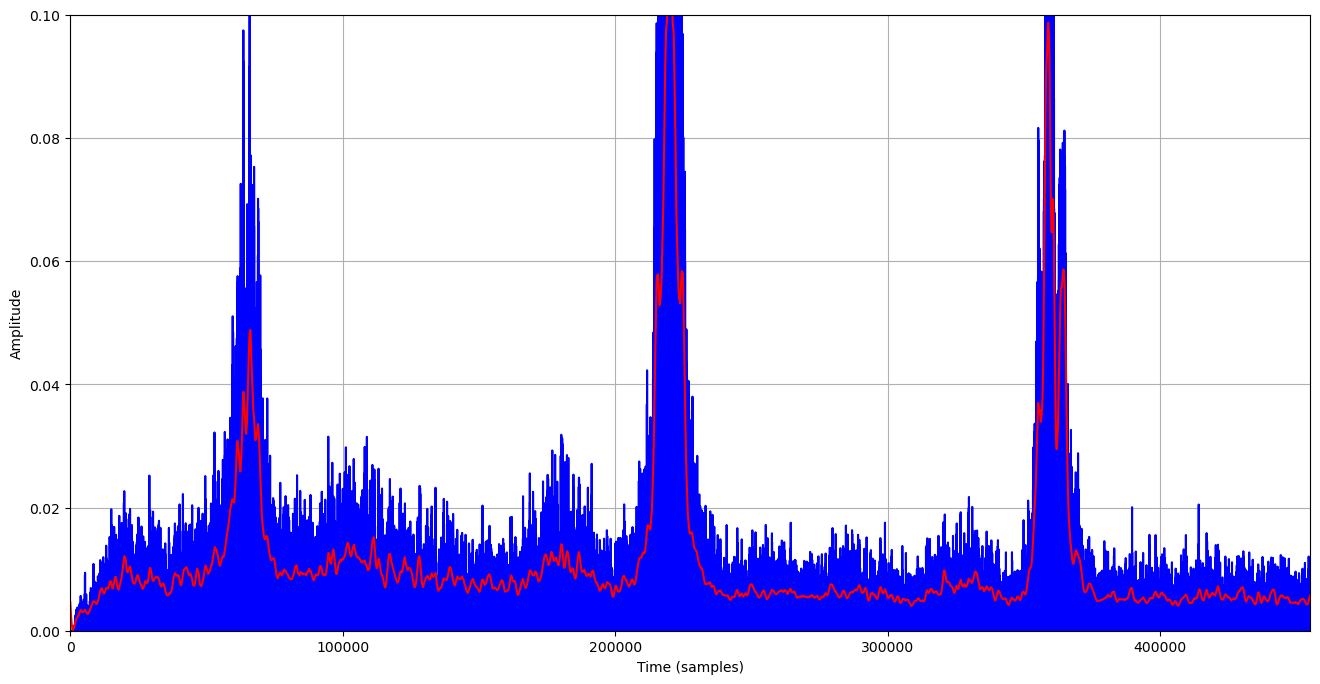

In [28]:
plt.figure(figsize=(16, 8))
plt.plot(x_new, color='blue')
plt.plot(envelope_1, color="red")
plt.xlim([0, x_new.shape[0]])
plt.ylim([0,0.1])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid()

## Select filtered chunks

In [29]:
# do poprawy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html
threshold=0.0175
ind_stop=np.where((envelope_1[0:-2]>=threshold)&(envelope_1[1:-1]<threshold))
env_shift = np.empty(len(envelope_1))
env_shift[0]=np.NaN
env_shift[1:]=envelope_1[0:-1]
ind_start=np.where((envelope_1>=threshold)&(env_shift<threshold))
time_start=ind_start[0]-filter_delay
time_stop=ind_stop[0]-filter_delay
start_stop=np.sort(np.concatenate((time_start, time_stop)))


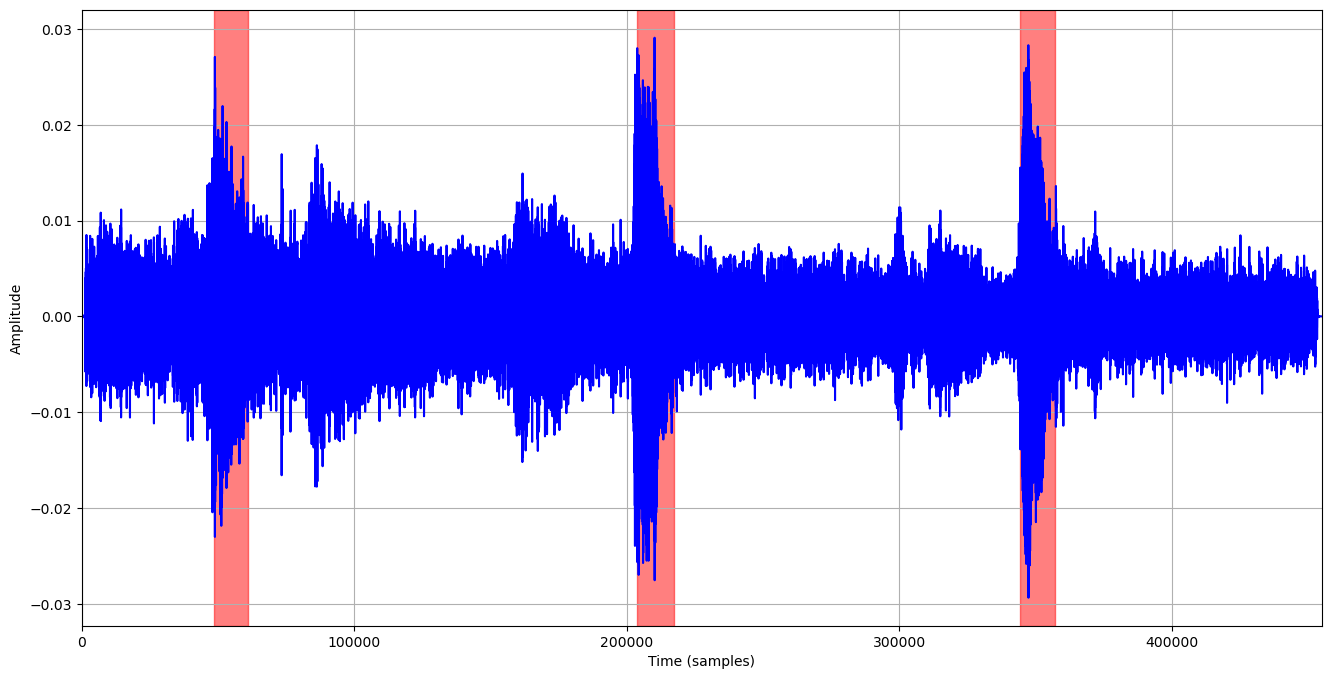

In [30]:
plot_selected_waveform(x, start_stop)